In [39]:
from uzapy.architecture.dnn import DNN

import pandas as pd
import numpy as np

### Load data

In [40]:
data = pd.read_csv('datasets/diabetes.csv')

### Check if data hasn't empty data (null or nan)

In [41]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Split and normalize data

In [42]:
data_train = data.sample(frac=0.7, axis=0)
data_test  = data.drop(data_train.index)

x_train    = data_train.drop('Outcome', axis=1)
y_train    = data_train['Outcome']
x_test     = data_test.drop('Outcome', axis=1)
y_test     = data_test['Outcome']


mean    = x_train.mean()
std     = x_train.std()
x_train = (x_train - mean) / std
x_test  = (x_test  - mean) / std

In [43]:
x_train = np.array(x_train)
y_train = np.array(y_train).reshape(-1, 1)
x_test  = np.array(x_test)
y_test  = np.array(y_test).reshape(-1, 1)

In [44]:
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (538, 8)
y_train shape:  (538, 1)
x_test shape:  (230, 8)
y_test shape:  (230, 1)


### Build the model

In [45]:
from uzapy.optimezers import RMSProp, SGDMomentum


def build_model(input_size):
  model = DNN(input_size)

  model.add(2, activation='sigmoid')
  model.add(1, activation='sigmoid')
  
  model.compile('binary_crossentropy', 'adam', ['accuracy'])

  return model

### Train the model

In [46]:
model = build_model(x_train.shape[1])
model.train((x_train.T, y_train.T), (x_test.T, y_test.T), lr=0.001, batch_size=10, shuffle=True, epoch=400, verbose=False)

100%|██████████| 400/400 [00:15<00:00, 26.14it/s]


### Visualize model training progess

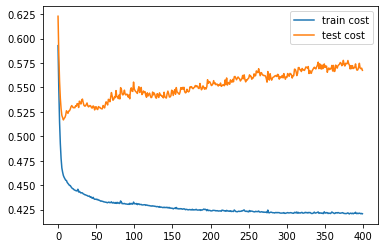

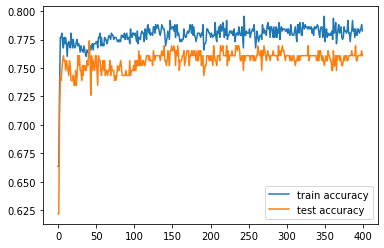

train accuracy:  0.78253
test  accuracy :  0.76087


In [47]:
model.plot_history('cost', lloc='up')
model.plot_history('accuracy', lloc='down')
model.performance()

In [48]:
def make_prediction(on, idx):
  if on == 'train':
    X = x_train
    Y = y_train
  else:
    X = y_test
    Y = y_test
  
  x = X[idx].reshape(-1, 1)
  y_true = Y[idx][0]
  y_pred = 0 if (model.predict(x)[0][0] < 0.5) else 1
  print("y true: ", y_true)
  print("y pred: ", y_pred)

In [49]:
make_prediction('train', 33)

y true:  0
y pred:  0
